In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['ggplot', 'assets/class.mplstyle'])

red = '#E24A33'
blue = '#348ABD'
purple = '#988ED5'
gray = '#777777'
yellow = '#FBC15E'
green = '#8EBA42'
pink = '#FFB5B8'

# Exploring linear regressions

[Scikit-Learn page.](https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression)

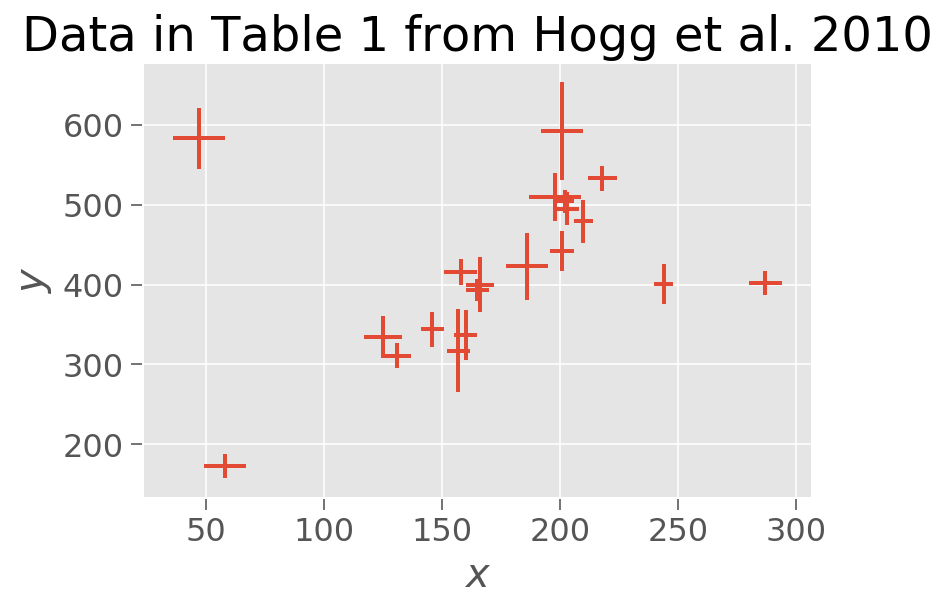

In [3]:
import pandas as pd

data = pd.read_csv('assets/04-table1.csv', index_col='ID')

plt.errorbar(data.x, data.y, yerr=data.sigma_y, xerr=data.sigma_x, ls='None')
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.title('Data in Table 1 from Hogg et al. 2010');

### Split the data

In [4]:
from sklearn.model_selection import train_test_split

np.random.seed(987)


train, test = train_test_split(data)

We will try Ordinary Least squares, Lasso, Ridge, and Huber Loss.

In [5]:
from sklearn import linear_model

In [6]:
train.x.values.reshape(-1,1)

array([[218],
       [201],
       [201],
       [157],
       [125],
       [131],
       [ 47],
       [166],
       [287],
       [186],
       [ 58],
       [165],
       [158],
       [202],
       [146]])

In [7]:
# OLS
ols = linear_model.LinearRegression()
ols.fit(train.x.values.reshape(-1,1), train.y.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Ridge
ridge = linear_model.Ridge(alpha=100)
ridge.fit(train.x.values.reshape(-1,1), train.y.values.reshape(-1,1))

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
# Lasso
lasso = linear_model.Lasso(alpha=30)
lasso.fit(train.x.values.reshape(-1,1), train.y.values.reshape(-1,1))

Lasso(alpha=30, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [10]:
# Hubber
hubber = linear_model.HuberRegressor(epsilon=1.35, alpha=0.9)
hubber.fit(train.x.values.reshape(-1,1), train.y.values.reshape(-1,1))

/Users/tino/.local/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HuberRegressor(alpha=0.9, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

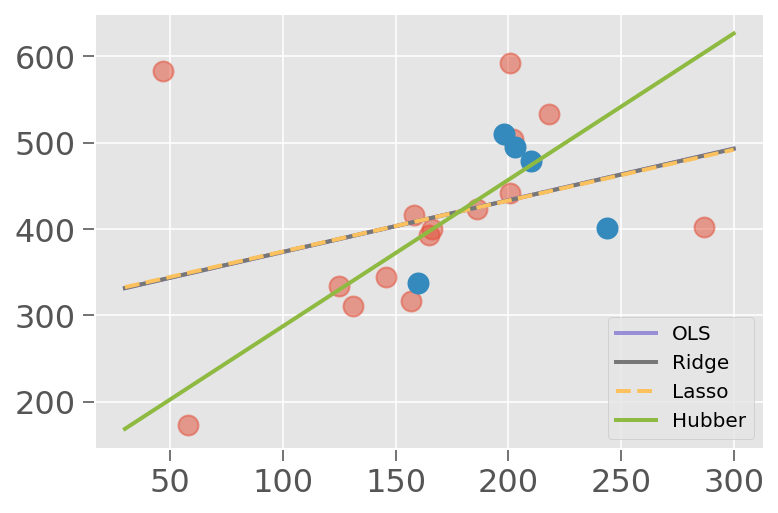

In [11]:
plt.plot(train.x, train.y, 'o', alpha=0.5)
plt.plot(test.x, test.y, 'o')

x_to_plot = np.linspace(30, 300, 100)
plt.plot(x_to_plot, ols.predict(x_to_plot.reshape(-1,1)), label='OLS')
plt.plot(x_to_plot, ridge.predict(x_to_plot.reshape(-1,1)), label='Ridge')
plt.plot(x_to_plot, lasso.predict(x_to_plot.reshape(-1,1)), '--', label='Lasso')

plt.plot(x_to_plot, hubber.predict(x_to_plot.reshape(-1,1)), label='Hubber')

plt.legend()

---

## Polynomial Regressions

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [13]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', linear_model.LinearRegression())])
model = model.fit(train.x.values.reshape(-1,1), train.y.values.reshape(-1,1))
model.named_steps['linear'].coef_

array([[ 0.00000000e+00, -1.76671442e+01,  1.25016211e-01,
        -2.47373985e-04]])

In [14]:
poly_ridge = Pipeline([('poly', PolynomialFeatures(degree=3)),
                       ('linear', linear_model.Ridge(alpha=100.))])
poly_ridge = poly_ridge.fit(train.x.values.reshape(-1,1), train.y.values.reshape(-1,1))
poly_ridge.named_steps['linear'].coef_

array([[ 0.00000000e+00, -1.21620666e+01,  8.82502078e-02,
        -1.75905389e-04]])

In [15]:
poly_lasso = Pipeline([('poly', PolynomialFeatures(degree=3)),
                       ('linear', linear_model.Lasso(alpha=50.))])
poly_lasso = poly_lasso.fit(train.x.values.reshape(-1,1), train.y.values.reshape(-1,1))
poly_lasso.named_steps['linear'].coef_

/Users/tino/.local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53415.15798303745, tolerance: 17.343173333333336
  positive)


array([ 0.00000000e+00, -9.63011591e+00,  7.08531709e-02, -1.41409743e-04])

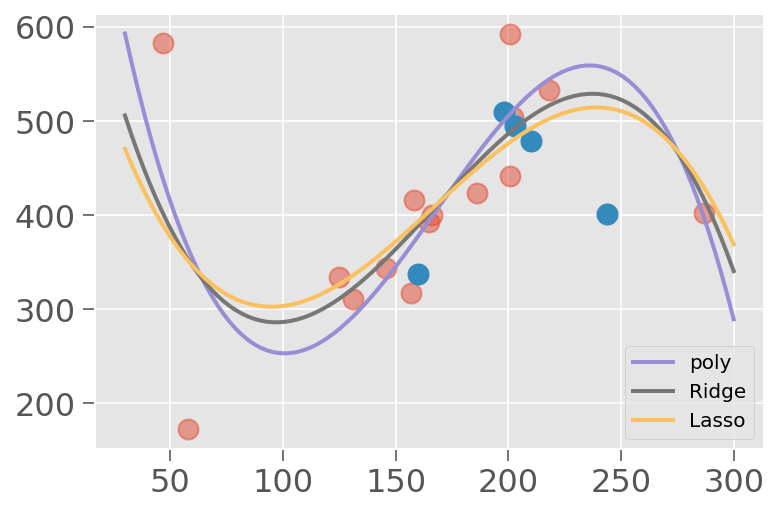

In [16]:
x_to_plot = np.linspace(30, 300, 100)
plt.plot(train.x, train.y, 'o', alpha=0.5)
plt.plot(test.x, test.y, 'o')

x_to_plot = np.linspace(30, 300, 100)

plt.plot(x_to_plot, model.predict(x_to_plot.reshape(-1,1)), label='poly')
plt.plot(x_to_plot, poly_ridge.predict(x_to_plot.reshape(-1,1)), label='Ridge')
plt.plot(x_to_plot, poly_lasso.predict(x_to_plot.reshape(-1,1)), label='Lasso')


plt.legend()